In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
# Import the ARMA class directly from the correct module
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [28]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file

Saving Book1.xlsx to Book1 (3).xlsx


In [30]:
# Load the uploaded file
data = pd.read_excel("Book1 (3).xlsx")  # Use the exact file name as uploaded
data_clean = data.dropna(subset=['Inflation', 'Interest rate', 'Money Supply', 'Exports', 'Imports', 'Foreign Exchange Reserves', 'Industrial Production', 'XR'])
print(data.head())


        Date  Industrial Production  Inflation    Exports    Imports  \
0 2000-04-01               6.462585   4.067797  23.632629  35.063291   
1 2000-05-01               5.960265   4.026846  37.661883  22.901349   
2 2000-06-01               5.878332   2.990033  29.497610  13.615705   
3 2000-07-01               4.966443   1.973684  16.093222  10.341040   
4 2000-08-01               4.860186   0.000000  21.710717   0.523560   

   Money Supply  Interest rate  Foreign Exchange Reserves        XR  
0     12.917093           7.04                  -0.276651  1.961700  
1     12.469639           7.03                   0.352968  4.061625  
2     12.612951           7.51                  -1.159975  3.044280  
3     11.438012           8.22                  -0.676367  3.927004  
4     11.453156          13.74                   0.080981  5.335787  


In [31]:
# Define features and target
X = data_clean[['Interest rate', 'Money Supply', 'Exports', 'Imports', 'Foreign Exchange Reserves', 'Industrial Production', 'XR']]
y = data_clean['Inflation']

In [32]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

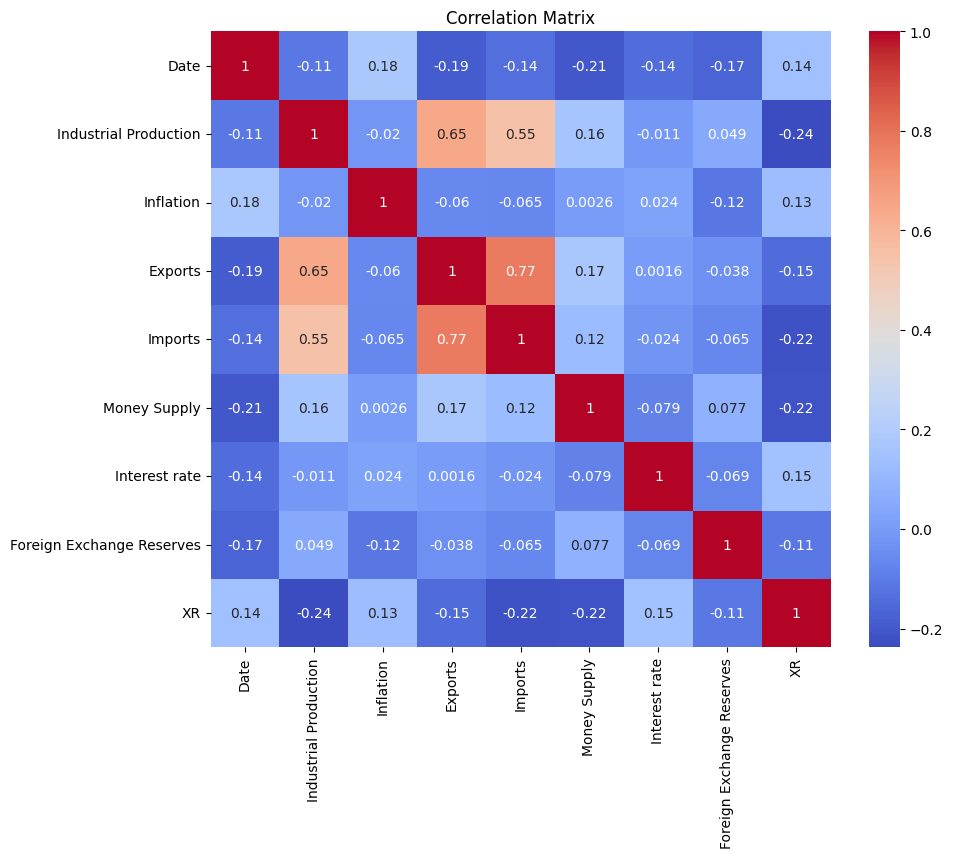

In [33]:
# Plotting correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')



# Define target variable
target = 'Inflation'

# Define models with different feature sets
feature_sets = {
    'Model 1': ['Interest rate', 'Money Supply', 'Exports', 'Imports', 'Industrial Production'],
    'Model 2': ['Interest rate', 'Money Supply', 'Exports', 'Imports', 'Industrial Production', 'XR'],
    'Model 3': ['Interest rate', 'Money Supply', 'Exports', 'Imports', 'Foreign Exchange Reserves', 'Industrial Production', 'XR']
}

# Dictionary to store results
results = {}

# Loop over each model configuration
for model_name, features in feature_sets.items():
    print(f"\n--- {model_name} ---")

    # Select features and target
    X = data[features]
    y = data[target]

    # Split data into train-test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define models
    models = {
        'Multiple Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'Support Vector Regression': SVR(),
        'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
        'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
    }

    # Evaluate each model
    for model_key, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mse = mean_squared_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)

        # Store the results
        if model_name not in results:
            results[model_name] = {}
        results[model_name][model_key] = {'RMSE': rmse, 'MSE': mse, 'MAPE': mape}

        print(f"{model_key} - RMSE: {rmse:.4f}, MSE: {mse:.4f}, MAPE: {mape:.4f}")

    # ARIMA Model (requires univariate series)
    if model_name == 'Model 1':  # Assuming ARIMA is applied only on Model 1 as a univariate model
        arima_order = (5, 1, 0)  # Define appropriate ARIMA order based on analysis
        arima_model = ARIMA(y_train, order=arima_order)
        arima_fit = arima_model.fit()
        arima_forecast = arima_fit.forecast(steps=len(y_test))

        # Calculate metrics
        rmse_arima = np.sqrt(mean_squared_error(y_test, arima_forecast))
        mse_arima = mean_squared_error(y_test, arima_forecast)
        mape_arima = mean_absolute_percentage_error(y_test, arima_forecast)

        results[model_name]['ARIMA'] = {'RMSE': rmse_arima, 'MSE': mse_arima, 'MAPE': mape_arima}
        print(f"ARIMA - RMSE: {rmse_arima:.4f}, MSE: {mse_arima:.4f}, MAPE: {mape_arima:.4f}")

    # ARMA Model using ARIMA with (p, d, q) where d=0
    arma_order = (5, 0, 0)  # ARMA(p,q) is ARIMA(p,0,q)
    arma_model = ARIMA(y_train, order=arma_order)
    arma_fit = arma_model.fit()
    arma_forecast = arma_fit.forecast(steps=len(y_test))

    # Calculate metrics
    rmse_arma = np.sqrt(mean_squared_error(y_test, arma_forecast))
    mse_arma = mean_squared_error(y_test, arma_forecast)
    mape_arma = mean_absolute_percentage_error(y_test, arma_forecast)

    results[model_name]['ARMA'] = {'RMSE': rmse_arma, 'MSE': mse_arma, 'MAPE': mape_arma}
    print(f"ARMA - RMSE: {rmse_arma:.4f}, MSE: {mse_arma:.4f}, MAPE: {mape_arma:.4f}")

# Convert results to DataFrame for comparison
results_df = pd.DataFrame({(i,j): results[i][j] for i in results.keys() for j in results[i].keys()}).T
print("\nPerformance Comparison:")
print(results_df)



--- Model 1 ---
Multiple Regression - RMSE: 4.7094, MSE: 22.1780, MAPE: 0.5708
Random Forest - RMSE: 4.5824, MSE: 20.9988, MAPE: 0.8250
Gradient Boosting - RMSE: 4.3317, MSE: 18.7638, MAPE: 0.6915
Support Vector Regression - RMSE: 2.3253, MSE: 5.4070, MAPE: 0.3886
K-Nearest Neighbors - RMSE: 3.4259, MSE: 11.7368, MAPE: 0.5019
XGBoost - RMSE: 4.0432, MSE: 16.3477, MAPE: 0.6482
ARIMA - RMSE: 3.0330, MSE: 9.1992, MAPE: 0.5971
ARMA - RMSE: 2.0889, MSE: 4.3636, MAPE: 0.3803

--- Model 2 ---
Multiple Regression - RMSE: 6.0372, MSE: 36.4483, MAPE: 0.6760
Random Forest - RMSE: 4.5357, MSE: 20.5725, MAPE: 0.8161
Gradient Boosting - RMSE: 4.6006, MSE: 21.1655, MAPE: 0.7295
Support Vector Regression - RMSE: 2.6568, MSE: 7.0589, MAPE: 0.4272
K-Nearest Neighbors - RMSE: 3.5456, MSE: 12.5715, MAPE: 0.5307
XGBoost - RMSE: 4.3937, MSE: 19.3048, MAPE: 0.6941
ARMA - RMSE: 2.0889, MSE: 4.3636, MAPE: 0.3803

--- Model 3 ---
Multiple Regression - RMSE: 6.1817, MSE: 38.2137, MAPE: 0.6948
Random Forest - RM

In [21]:
# Define feature sets for each model
feature_sets = {
    "Model 1": ['Interest rate', 'Money Supply', 'Exports', 'Imports', 'Industrial Production'],
    "Model 2": ['Interest rate', 'Money Supply', 'Exports', 'Imports', 'Industrial Production', 'XR'],
    "Model 3": ['Interest rate', 'Money Supply', 'Exports', 'Imports', 'Industrial Production', 'Foreign Exchange Reserves', 'XR']
}

# Define the target variable
target = 'Inflation'

# Now you can run the rest of the code provided earlier


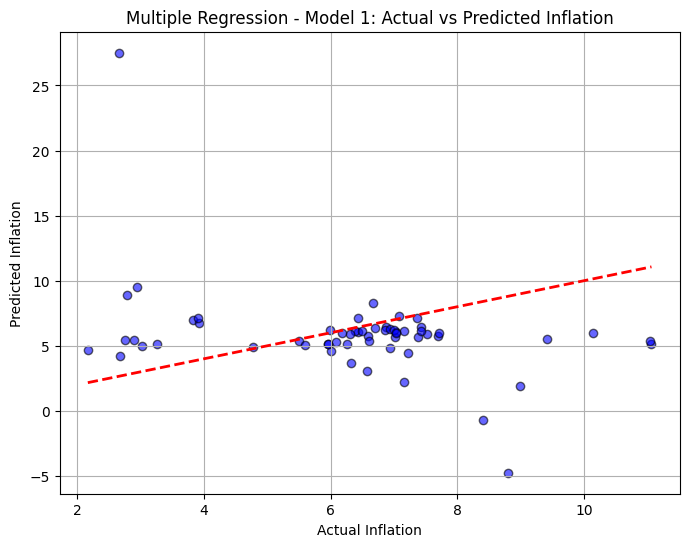

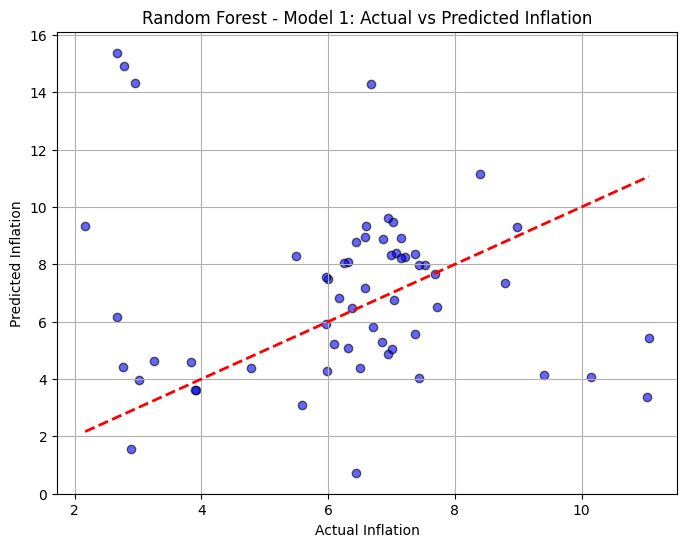

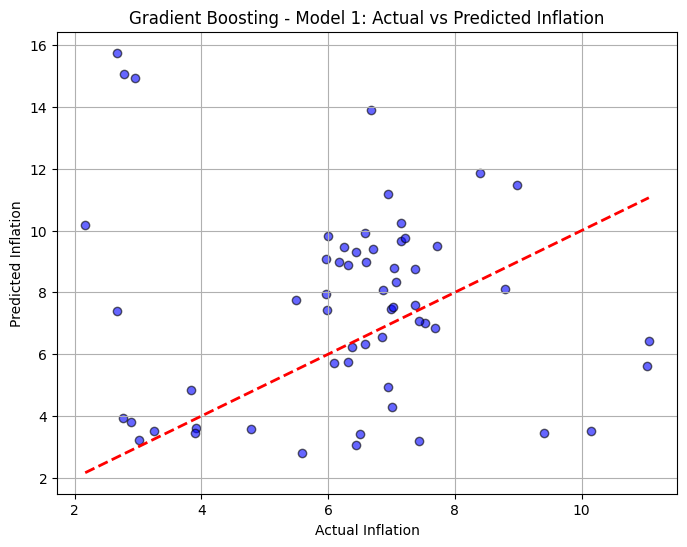

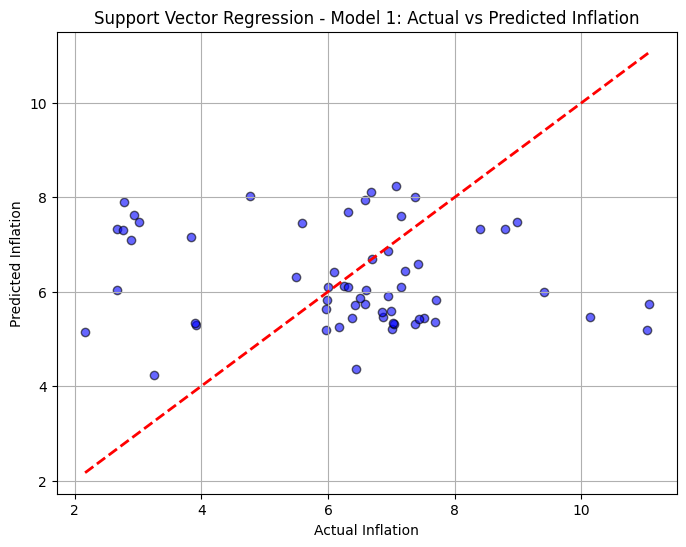

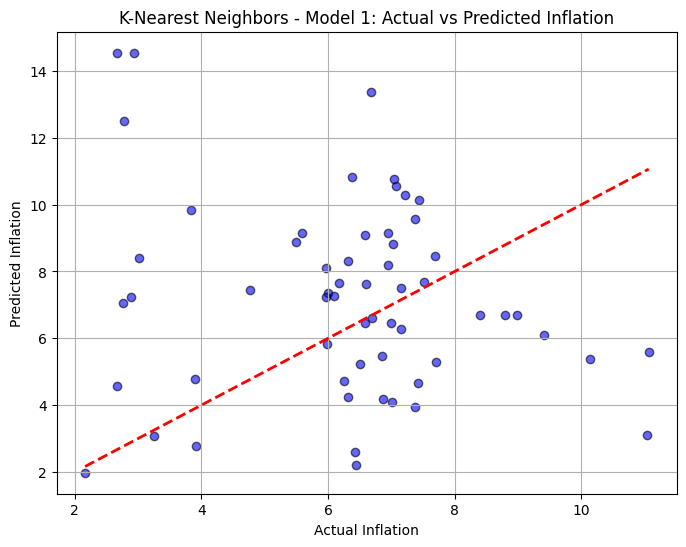

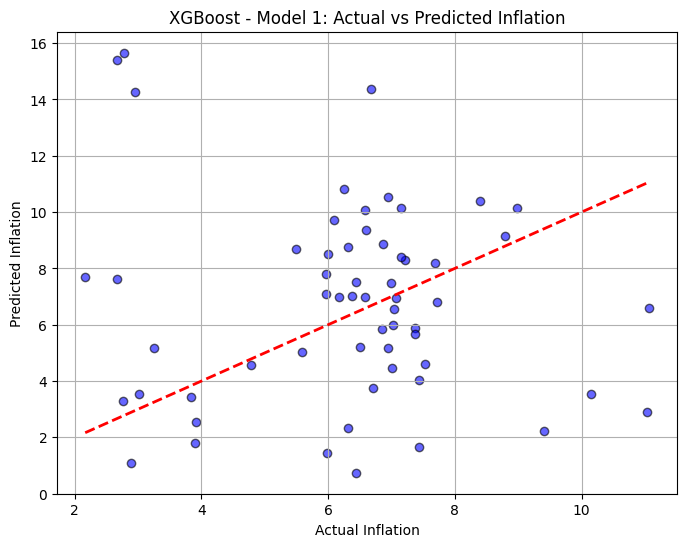

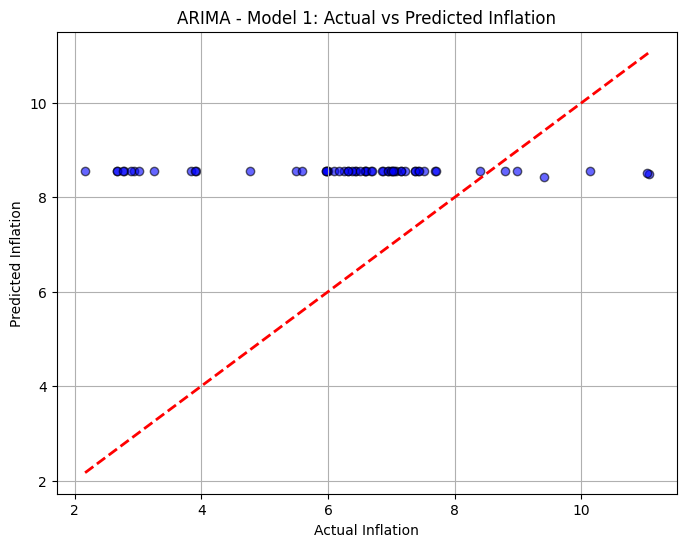

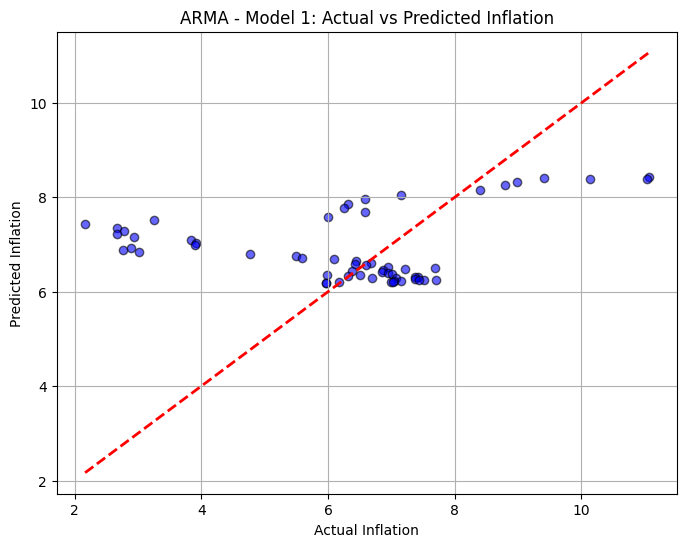

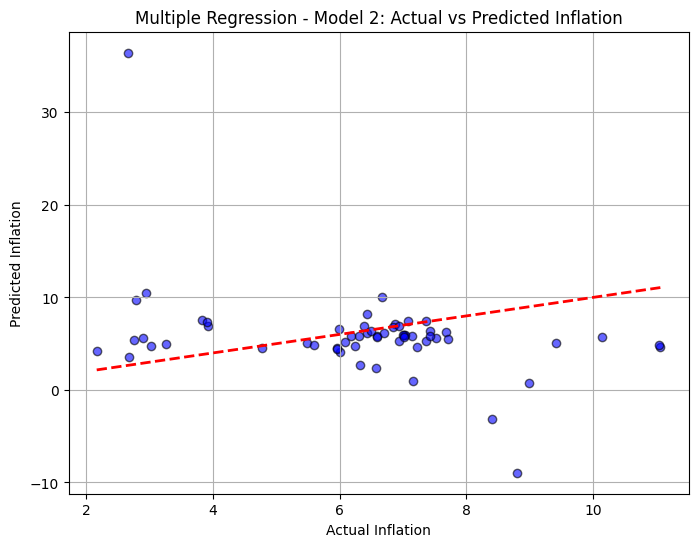

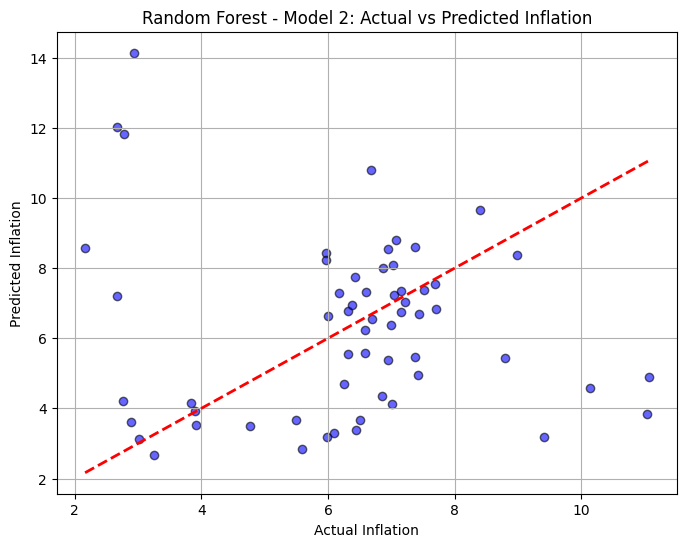

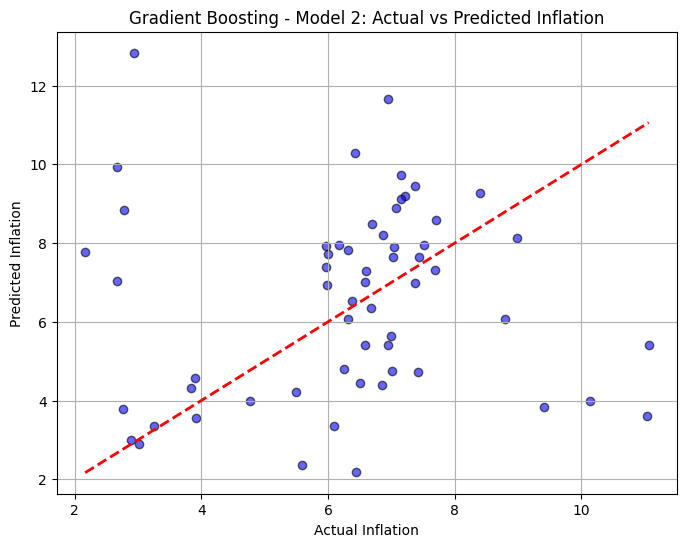

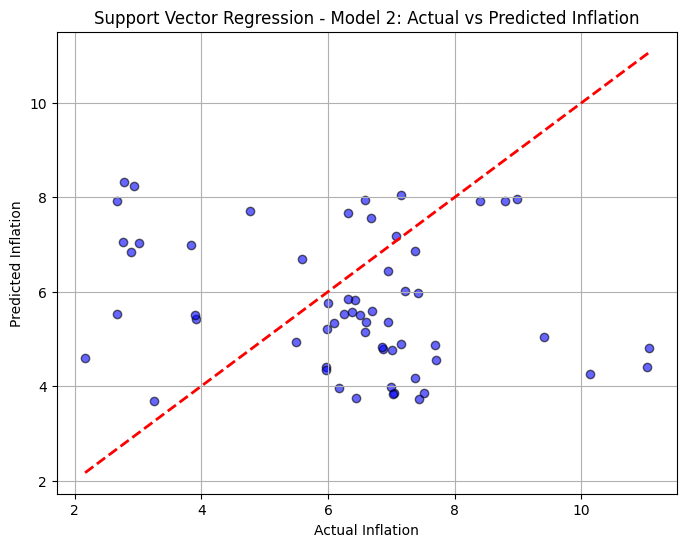

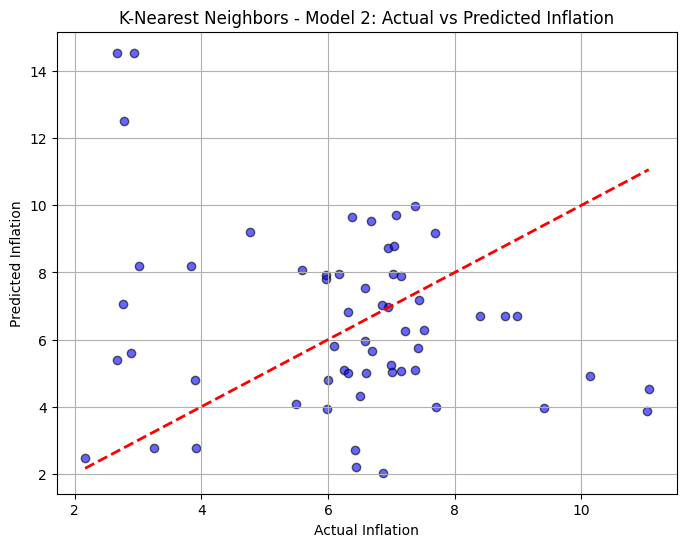

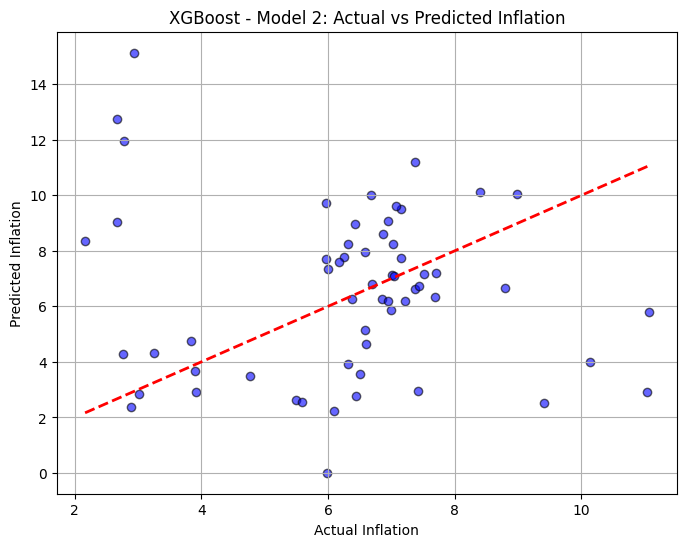

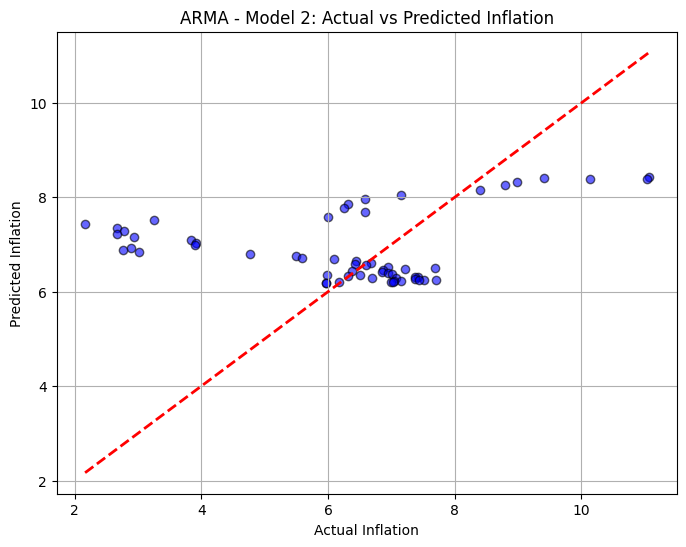

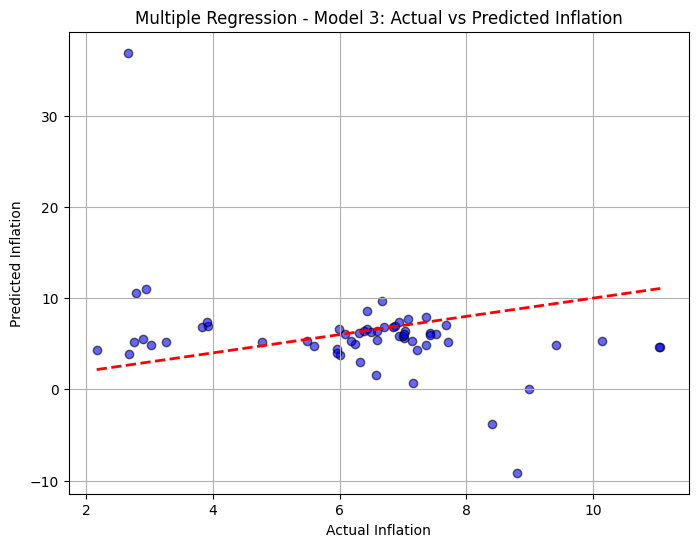

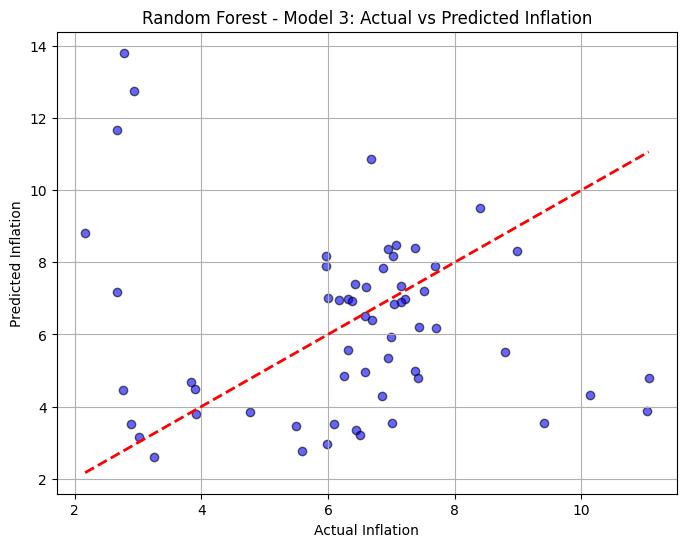

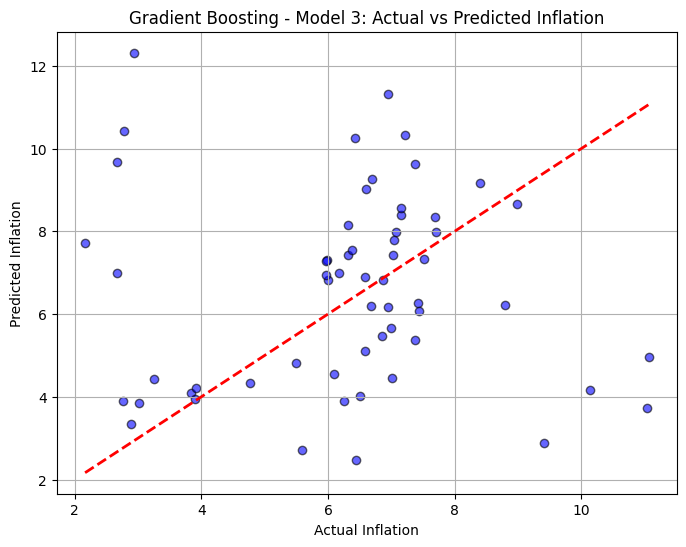

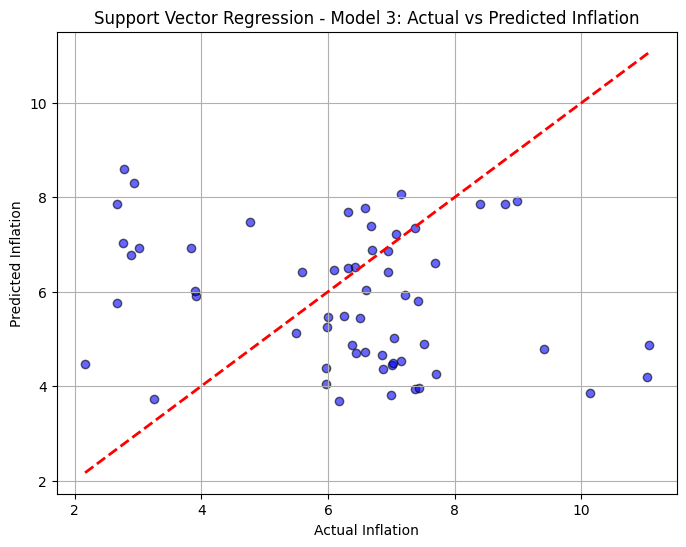

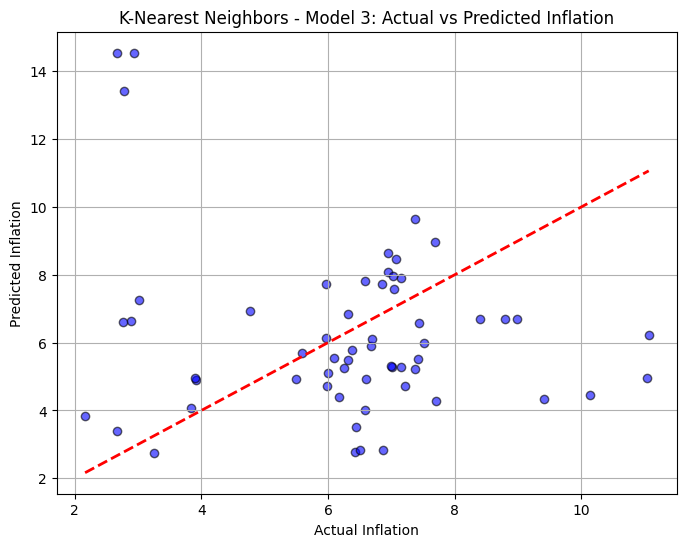

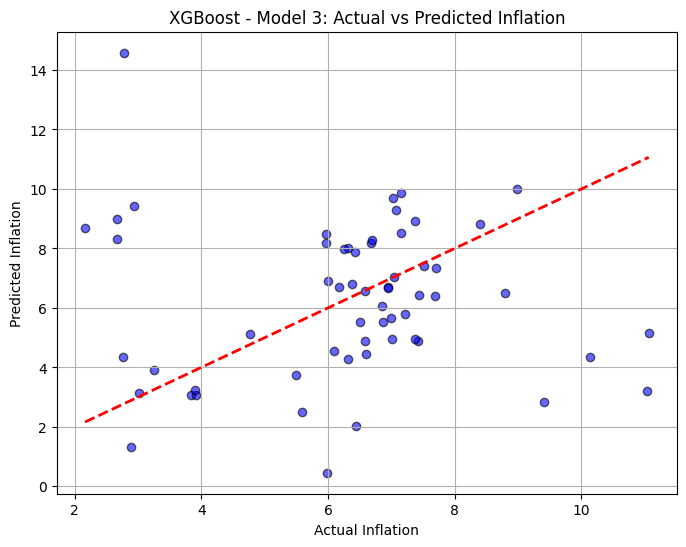

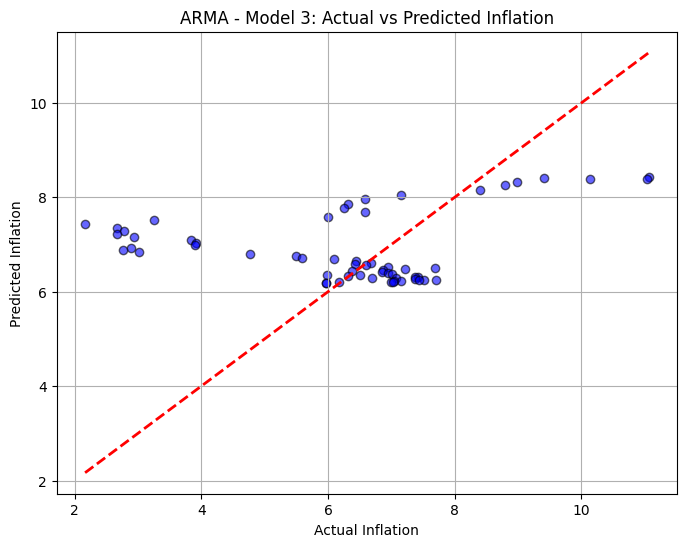

In [22]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted inflation
def scatter_plot_actual_vs_predicted(y_test, y_pred, model_name, method_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.xlabel("Actual Inflation")
    plt.ylabel("Predicted Inflation")
    plt.title(f"{method_name} - {model_name}: Actual vs Predicted Inflation")
    plt.grid(True)
    plt.show()

# Plotting for each model configuration and method
for model_name, features in feature_sets.items():
    # Define features and target for this model configuration
    X = data[features]
    y = data[target]

    # Split data into train-test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 1. Multiple Regression
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    y_pred_lr = lr.predict(X_test_scaled)
    scatter_plot_actual_vs_predicted(y_test, y_pred_lr, model_name, "Multiple Regression")

    # 2. Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    y_pred_rf = rf.predict(X_test_scaled)
    scatter_plot_actual_vs_predicted(y_test, y_pred_rf, model_name, "Random Forest")

    # 3. Gradient Boosting
    gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gb.fit(X_train_scaled, y_train)
    y_pred_gb = gb.predict(X_test_scaled)
    scatter_plot_actual_vs_predicted(y_test, y_pred_gb, model_name, "Gradient Boosting")

    # 4. Support Vector Regression (SVR)
    svr = SVR()
    svr.fit(X_train_scaled, y_train)
    y_pred_svr = svr.predict(X_test_scaled)
    scatter_plot_actual_vs_predicted(y_test, y_pred_svr, model_name, "Support Vector Regression")

    # 5. K-Nearest Neighbors
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    scatter_plot_actual_vs_predicted(y_test, y_pred_knn, model_name, "K-Nearest Neighbors")

    # 6. XGBoost
    xgb = XGBRegressor(n_estimators=100, random_state=42)
    xgb.fit(X_train_scaled, y_train)
    y_pred_xgb = xgb.predict(X_test_scaled)
    scatter_plot_actual_vs_predicted(y_test, y_pred_xgb, model_name, "XGBoost")

    # 7. ARIMA (Univariate Forecast)
    if model_name == 'Model 1':  # Assuming ARIMA is applied only on Model 1 as a univariate model
        arima_model = ARIMA(y_train, order=(5, 1, 0))  # Define appropriate ARIMA order based on analysis
        arima_fit = arima_model.fit()
        arima_forecast = arima_fit.forecast(steps=len(y_test))
        scatter_plot_actual_vs_predicted(y_test, arima_forecast, model_name, "ARIMA")

    # 8. ARMA (modeled using ARIMA with (p,0,q))
    arma_model = ARIMA(y_train, order=(5, 0, 0))  # ARMA(p, q) is ARIMA(p,0,q)
    arma_fit = arma_model.fit()
    arma_forecast = arma_fit.forecast(steps=len(y_test))
    scatter_plot_actual_vs_predicted(y_test, arma_forecast, model_name, "ARMA")
